# Perguntas frequentes
A API de agregados impõe alguma restrição à requisição ?
Para Variáveis por agregado, períodos pesquisados e identificador da variável e Variáveis por agregado e identificador da variável, cada requisição permite retornar no máximo 100.000 valores. Para saber a quantidade de valores retornados, use a seguinte fórmula:

Nº de categorias x Nº de períodos x Nº de localidades <= 100.000

Por exemplo, para a requisição https://servicodados.ibge.gov.br/api/v3/agregados/2654/variaveis?classificacao=244[0]|1836[26877,99818]|2[4,5]|260[5965]&localidades=N6[1100015,1100023,1100031,1100049], há

Classificação 244   - 1 categoria (0)
Classificação 1836 - 2 categorias (26877,99818)
Classificação 2        - 2 categorias (4,5)
Classificação 260   - 1 categoria (5965)

4 categorias (1 x 2 x 2 x 1) x 6 últimos períodos (Valor padrão quando não informado) x 4 localidades (1100015,1100023,1100031,1100049) = 96 valores.

obs: se a requisição exceder 100.000 valores, será retornado erro 500

# API-IBGE: Análise de dados sobre espécies ameaçadas de extinção no territorio Brasileiro.

QueryBuilder: https://servicodados.ibge.gov.br/api/v3/agregados/9625/periodos/2014|2022/variaveis/10484?localidades=N1[all]&classificacao=454[all]|919[48243]|971[48741,59952,59953,59954,59955,59956,59957,59958]|12920[119363,119343,119344,119345,119346]


In [19]:
import requests
import pprint
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
link = 'https://servicodados.ibge.gov.br/api/v3/agregados/9625/periodos/2014|2022/variaveis/10484?localidades=N1[all]&classificacao=454[all]|919[48243]|971[48741,59952,59953,59954,59955,59956,59957,59958]|12920[119363,119343,119344,119345,119346]'

requisicao = requests.get(link)
informacoes = requisicao.json()

pprint.pprint(informacoes)


[{'id': '10484',
  'resultados': [{'classificacoes': [{'categoria': {'47952': 'Total'},
                                      'id': '454',
                                      'nome': 'Grupos taxonômicos, hábito ou '
                                              'forma de vida'},
                                     {'categoria': {'48243': 'Total'},
                                      'id': '919',
                                      'nome': 'Tipo de ambiente'},
                                     {'categoria': {'48741': 'Total'},
                                      'id': '971',
                                      'nome': 'Biomas e Sistema '
                                              'Costeiro-Marinho'},
                                     {'categoria': {'119363': 'Total'},
                                      'id': '12920',
                                      'nome': 'Categorias de risco'}],
                  'series': [{'localidade': {'id': '1',
                      

In [21]:
import csv

# Dados fornecidos
dados = [
    {
        'id': '10484',
        'resultados': [
            {
                'classificacoes': [
                    {
                        'categoria': {'47952': 'Total'},
                        'id': '454',
                        'nome': 'Grupos taxonômicos, hábito ou forma de vida'
                    },
                    {
                        'categoria': {'48243': 'Total'},
                        'id': '919',
                        'nome': 'Tipo de ambiente'
                    },
                    {
                        'categoria': {'48741': 'Total'},
                        'id': '971',
                        'nome': 'Biomas e Sistema Costeiro-Marinho'
                    },
                    {
                        'categoria': {'119363': 'Total'},
                        'id': '12920',
                        'nome': 'Categorias de risco'
                    }
                ],
                'series': [
                    {
                        'localidade': {
                            'id': '1',
                            'nivel': {'id': 'N1', 'nome': 'Brasil'},
                            'nome': 'Brasil'
                        },
                        'serie': {'2014': '16313', '2022': '21456'}
                    }
                ]
            }
            # Adicione mais blocos de dados aqui, se necessário
        ],
        'unidade': 'Unidades',
        'variavel': 'Número de espécies da fauna e da flora brasileira avaliadas quanto ao risco de extinção'
    }
    # Adicione mais itens de dados aqui, se necessário
]

# Abrir um arquivo CSV para escrita com codificação UTF-8
with open('dados_ibge.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['variavel', 'localidade_id', 'localidade_nome', 'ano_2014', 'ano_2022']  # Nomes das colunas
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()  # Escrever cabeçalho no CSV

    # Iterar pelos dados e escrever cada linha no CSV
    for item in dados:
        for resultado in item['resultados']:
            for serie in resultado['series']:
                writer.writerow({
                    'variavel': item['variavel'],
                    'localidade_id': serie['localidade']['id'],
                    'localidade_nome': serie['localidade']['nome'],
                    'ano_2014': serie['serie']['2014'],
                    'ano_2022': serie['serie']['2022'],
                })


In [22]:
tabela = pd.read_csv('dados_ibge.csv')
display(tabela)

,variavel,localidade_id,localidade_nome,ano_2014,ano_2022
0,Número de espécies da fauna e da flora brasile...,1,Brasil,16313,21456


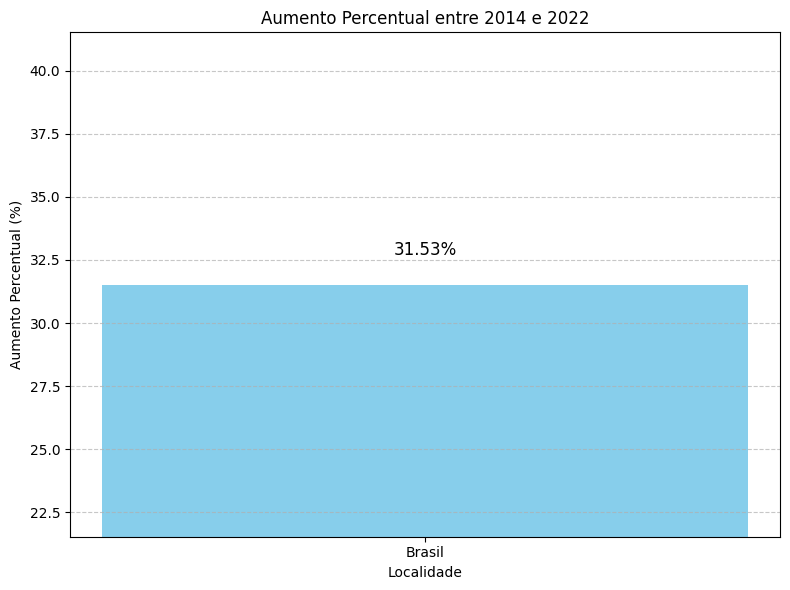

In [23]:
# Dados fornecidos (substitua pelo seu conjunto de dados)
data = {
    'variavel': ['Número de espécies da fauna e da flora brasileira avaliadas quanto ao risco de extinção'],
    'localidade_id': [1],
    'localidade_nome': ['Brasil'],
    'ano_2014': [16313],
    'ano_2022': [21456]
}

# Crie um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Calcule a porcentagem de aumento entre 2014 e 2022
df['aumento_percentual'] = ((df['ano_2022'] - df['ano_2014']) / df['ano_2014']) * 100

# Crie o gráfico de barras para mostrar o aumento percentual
plt.figure(figsize=(8, 6))
plt.bar(df['localidade_nome'], df['aumento_percentual'], color='skyblue')
plt.xlabel('Localidade')
plt.ylabel('Aumento Percentual (%)')
plt.title('Aumento Percentual entre 2014 e 2022')
plt.ylim(min(df['aumento_percentual']) - 10, max(df['aumento_percentual']) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicione rótulos de dados nas barras
for i, v in enumerate(df['aumento_percentual']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
